<a href="https://colab.research.google.com/github/surPoudel/rna_seq_analysis/blob/main/RNAseq_analysis_postDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rubicon KO versus WT bulk RNAseq analysis Young and Old mice

The files are located locally in the folder /research/groups/greengrp/home/spoudel1/GreenLab_Projects/Joelle/RNAseq_analysis/Rubicon_KO_WT/

In [2]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')


Saving RubiconKO_Old_SKO_vs_WT_Old_SKO_diff_annot.txt to RubiconKO_Old_SKO_vs_WT_Old_SKO_diff_annot.txt
Saving RubiconKO_Young_SKO_vs_WT_Young_SKO_diff_annot.txt to RubiconKO_Young_SKO_vs_WT_Young_SKO_diff_annot.txt
Saving voom_normalized_data_annot.txt to voom_normalized_data_annot (1).txt
User uploaded file "RubiconKO_Old_SKO_vs_WT_Old_SKO_diff_annot.txt" with length 2636328 bytes
User uploaded file "RubiconKO_Young_SKO_vs_WT_Young_SKO_diff_annot.txt" with length 2635491 bytes
User uploaded file "voom_normalized_data_annot (1).txt" with length 10294331 bytes


In [4]:
import pandas as pd
# read normalized file before DE analysis
df = pd.read_csv('voom_normalized_data_annot.txt', delimiter='\t')
# read DE analysis after comparison with Young Rubicon vs. WT
df_young_de = pd.read_csv('RubiconKO_Young_SKO_vs_WT_Young_SKO_diff_annot.txt', delimiter='\t')
# read DE analysis after comparison with Old Rubicon vs. WT
df_old_de = pd.read_csv('RubiconKO_Old_SKO_vs_WT_Old_SKO_diff_annot.txt', delimiter='\t')

In [17]:
df.head()

,geneSymbol,bioType,annotationLevel,1954857_1,1954858_2,1954859_3,1954860_4,1954861_5,1954862_6,1954863_7,...,1954879_23,1954880_24,1954881_25,1954882_26,1954883_27,1954884_28,1954885_29,1954886_30,1954887_31,1954888_32
ENSMUSG00000000001.4,Gnai3,protein_coding,2,3.974183,4.009037,4.161520,4.004559,3.945335,4.137976,3.714052,...,4.036029,3.900854,3.904389,4.022637,3.982691,3.968572,3.764835,3.939315,3.907025,3.950673
ENSMUSG00000000028.15,Cdc45,protein_coding,2,0.700569,0.288172,0.693123,0.194949,0.358048,0.456295,0.711771,...,0.354573,1.054873,0.534562,0.438311,0.494290,0.373894,0.535538,0.201207,0.739952,0.779461
ENSMUSG00000000031.16,H19,lncRNA,2,2.951676,3.344247,3.665028,2.909095,2.770174,5.262469,2.688761,...,3.602004,3.287020,3.252566,3.674540,4.175144,3.465479,3.430416,3.501430,3.709988,3.682871
ENSMUSG00000000037.17,Scml2,protein_coding,1,-1.928248,-1.558419,-1.548635,-0.880715,-1.963880,-1.150864,-1.891570,...,-2.815352,-3.621588,-2.853168,-2.079537,-1.454885,-1.731223,-2.591952,-2.632499,-2.825901,-2.425653
ENSMUSG00000000049.11,Apoh,protein_coding,2,-2.776245,-3.303846,-0.043843,-3.733158,1.185211,-3.769774,-4.007047,...,-6.902815,-3.621588,-3.952703,-4.802003,-3.229326,-3.698056,-4.793586,-3.194378,-4.266474,-5.595578


In [10]:
#!pip install gseapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.1 MB/s eta 0:00:00


In [5]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2
import csv
import numpy as np
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

View the library in gseapy

In [12]:
names = gp.get_library_name()
print(names)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_2023', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and_Tissue_2021', 'Diabetes_Perturbations_GEO_2022', 'DisGeNET', 'Disease_Perturbations_from_GEO

Look at GO libraries only

In [13]:
for x in names:
    if x.startswith("GO_"):
        print (x)

GO_Biological_Process_2013
GO_Biological_Process_2015
GO_Biological_Process_2017
GO_Biological_Process_2017b
GO_Biological_Process_2018
GO_Biological_Process_2021
GO_Biological_Process_2023
GO_Cellular_Component_2013
GO_Cellular_Component_2015
GO_Cellular_Component_2017
GO_Cellular_Component_2017b
GO_Cellular_Component_2018
GO_Cellular_Component_2021
GO_Cellular_Component_2023
GO_Molecular_Function_2013
GO_Molecular_Function_2015
GO_Molecular_Function_2017
GO_Molecular_Function_2017b
GO_Molecular_Function_2018
GO_Molecular_Function_2021
GO_Molecular_Function_2023


# Young KO vs WT

Check for upregulated and downregulated DEG

In [6]:
DEGs_up_1d = (df_young_de[(df_young_de['logFC'] > 0.58) & (df_young_de['P.Value'] < 0.05)]).geneSymbol.tolist()
DEGs_down_1d = (df_young_de[(df_young_de['logFC'] < 0.58) & (df_young_de['P.Value'] < 0.05)]).geneSymbol.tolist()

Lets first try to make hierchichal clustering
* lets uplaod metafile so that we can parse the metafile sample information

In [19]:
uploaded = files.upload()

for filename in uploaded.keys():
  print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')

Saving meta_info_detail.csv to meta_info_detail.csv
User uploaded file "meta_info_detail.csv" with length 854 bytes


Extract the young sko columns only

In [7]:
meta_df = pd.read_csv("meta_info_detail.csv")
young_sko_cols = []
for cols in meta_df.Group:
    if "Young_SKO" in cols:
        young_sko_cols.append(cols)

In [8]:
meta_young_sko_df = meta_df[meta_df.Group.isin(young_sko_cols)]

In [9]:
meta_young_sko_df.head()

,SampleID,Group
0,1954857_1,WT_Young_SKO
1,1954858_2,WT_Young_SKO
2,1954859_3,WT_Young_SKO
3,1954860_4,WT_Young_SKO
4,1954861_5,RubiconKO_Young_SKO


In [10]:
gex_df2 = df.set_index("geneSymbol")
gex_young_sko = gex_df2[meta_young_sko_df.SampleID]
gex_young_sko.head()

,1954857_1,1954858_2,1954859_3,1954860_4,1954861_5,1954862_6,1954863_7,1954864_8
geneSymbol,,,,,,,,
Gnai3,3.974183,4.009037,4.161520,4.004559,3.945335,4.137976,3.714052,3.832064
Cdc45,0.700569,0.288172,0.693123,0.194949,0.358048,0.456295,0.711771,0.323515
H19,2.951676,3.344247,3.665028,2.909095,2.770174,5.262469,2.688761,2.946891
Scml2,-1.928248,-1.558419,-1.548635,-0.880715,-1.963880,-1.150864,-1.891570,-1.436534
Apoh,-2.776245,-3.303846,-0.043843,-3.733158,1.185211,-3.769774,-4.007047,-1.998413


extract the DEG from the gene expression file

In [18]:
all_de = DEGs_up_1d+DEGs_down_1d
gex_young_sko_de = gex_young_sko[gex_young_sko.index.isin(all_de)]

In [19]:
gex_young_sko_de.head()

,1954857_1,1954858_2,1954859_3,1954860_4,1954861_5,1954862_6,1954863_7,1954864_8
geneSymbol,,,,,,,,
Cav2,5.712131,5.721945,5.723963,5.868613,5.612574,5.351760,5.560909,5.558731
Ckmt1,-2.776245,-3.931877,-5.173126,-5.318120,-2.060096,0.022784,-3.270081,-2.690291
Comt,8.014538,8.049398,8.040434,8.273597,8.210603,7.745293,7.590230,7.754644
Pparg,3.688641,3.641426,3.793620,3.895389,3.511330,3.297853,3.508653,3.585117
Acvrl1,5.069663,5.130537,5.121112,5.103594,4.919945,4.787553,4.957775,5.050657


In [2]:
# import numpy as np
# from scipy.cluster.hierarchy import dendrogram, linkage
# from scipy.spatial.distance import pdist
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Calculate pairwise distances
# distances = pdist(gex_young_sko_de, metric='euclidean')

# # Perform hierarchical clustering
# linkage_matrix = linkage(distances, method='complete')

# # Plot the dendrogram
# plt.figure(figsize=(10, 7))
# dendrogram(linkage_matrix, labels=gex_young_sko_de.index)
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('Sample')
# plt.ylabel('Distance')
# plt.show()


In [13]:
gex_young_sko_de.columns

Index(['1954857_1', '1954858_2', '1954859_3', '1954860_4', '1954861_5',
       '1954862_6', '1954863_7', '1954864_8'],
      dtype='object')

<ipython-input-20-1353205be10e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gex_young_sko_de['Cluster'] = clusters


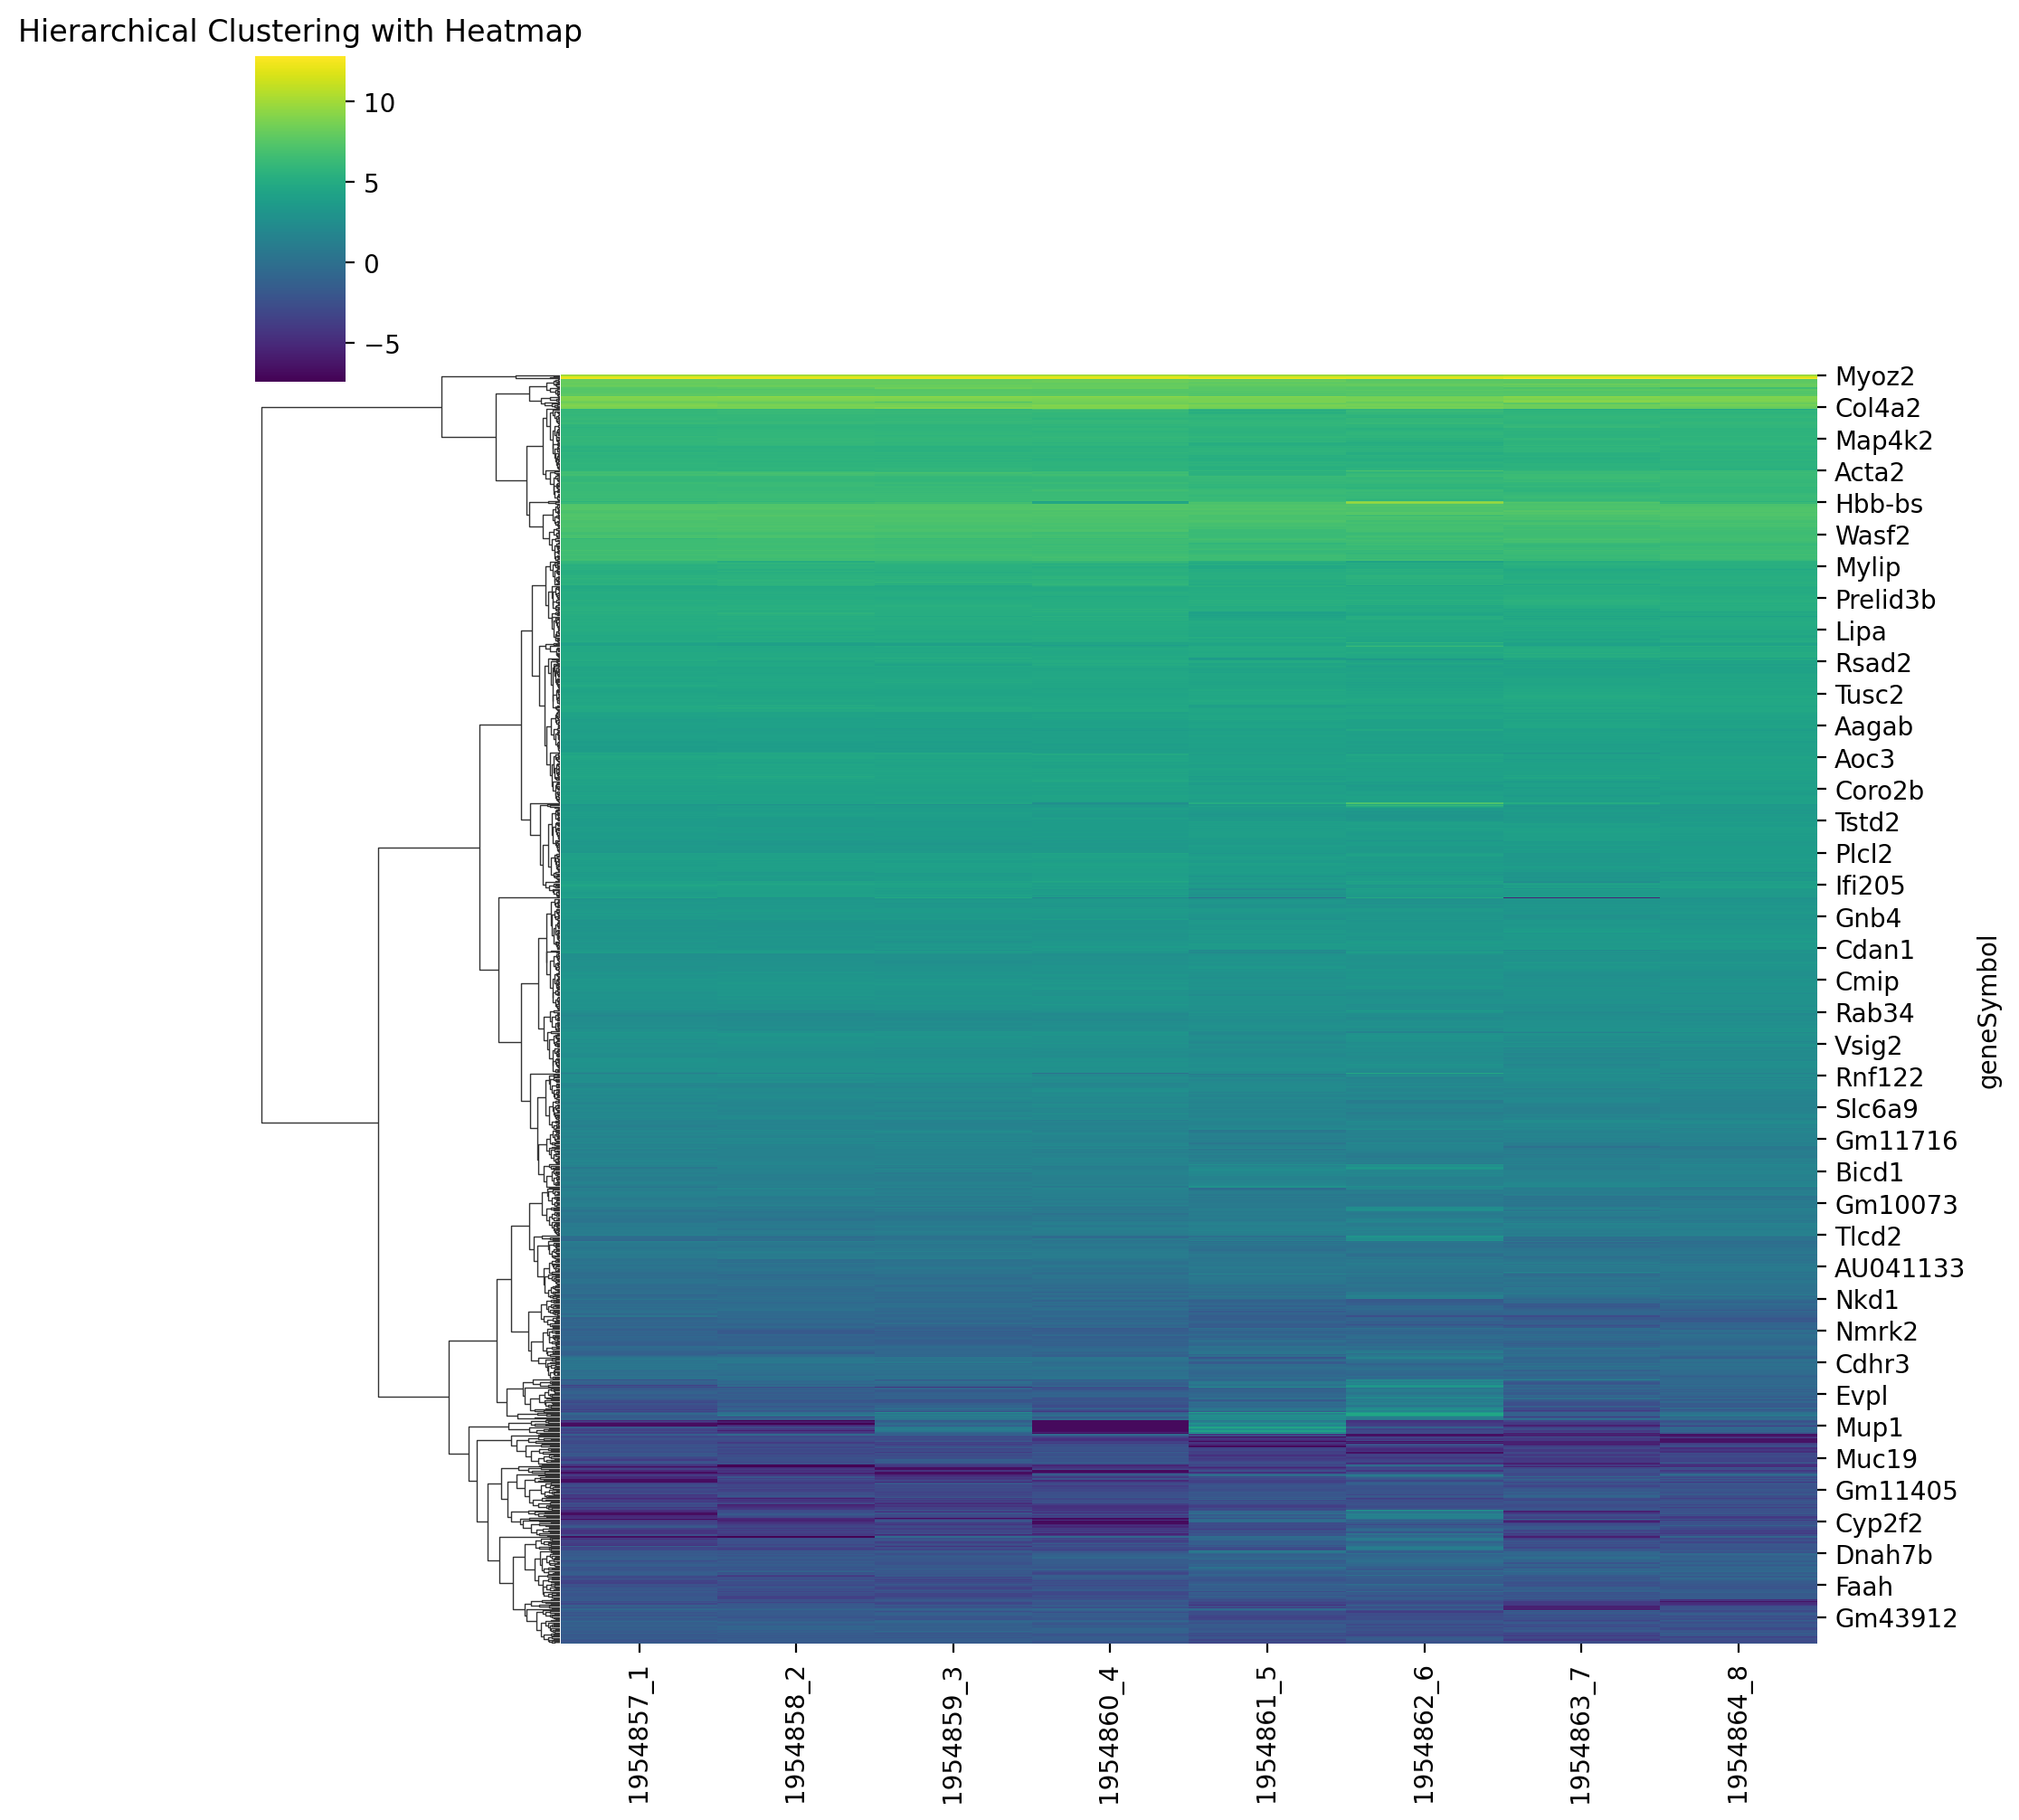

In [20]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming gex_young_sko_de is your DataFrame with gene expression data

# Calculate pairwise distances
distances = pdist(gex_young_sko_de, metric='euclidean')

# Perform hierarchical clustering
linkage_matrix = linkage(distances, method='complete')

# Determine the clusters, cutting the dendrogram at a height that results in a desired number of clusters
# 'maxclust' can be adjusted to get the desired number of clusters
clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Assign the cluster labels to your DataFrame
gex_young_sko_de['Cluster'] = clusters

# Create a heatmap with the dendrogram using seaborn's clustermap
# The row_cluster argument is set to False because we already performed the clustering
sns.clustermap(gex_young_sko_de.iloc[:, :-1],  # Exclude the 'Cluster' column from the heatmap
               method='complete',
               metric='euclidean',
               col_cluster=False,  # Only cluster rows, not columns
               figsize=(10, 10),
               row_linkage=linkage_matrix,  # Use the previously computed linkage matrix
               cmap='viridis')  # Change the colormap if needed

plt.title('Hierarchical Clustering with Heatmap')
plt.show()


In [21]:
gex_young_sko_de.Cluster.value_counts()

2    571
3    415
1    170
Name: Cluster, dtype: int64

check if cluster 1 and 2 are up or down regulated

In [22]:
# Assuming DEGs_up_1d and DEGs_down_1d are lists or sets containing gene identifiers

# Define a function to determine the direction based on gene presence in DEGs_up_1d or DEGs_down_1d
def determine_direction(gene):
    if gene in DEGs_up_1d:
        return 'Up'
    elif gene in DEGs_down_1d:
        return 'Down'
    else:
        return 'Neutral'  # For genes not found in either list, you can label them as 'Neutral' or choose another label

# Apply the function to the index of gex_young_sko_de to create the 'Direction' column
gex_young_sko_de['Direction'] = gex_young_sko_de.index.map(determine_direction)


<ipython-input-22-ad99c9382552>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gex_young_sko_de['Direction'] = gex_young_sko_de.index.map(determine_direction)


In [23]:
gex_young_sko_de.Direction.value_counts()

Down    940
Up      216
Name: Direction, dtype: int64

Enrichr Web Servie (with background input)

In [43]:
#https://rest.uniprot.org/uniprotkb/stream?compressed=true&fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cxref_dbsnp%2Cannotation_score%2Ccomment_count%2Cgene_oln%2Cgene_orf%2Cgene_primary%2Cgene_synonym%2Cxref_proteomes&format=tsv&query=%28proteome%3AUP000000589%29
import requests
import gzip
import io

# The API URL
# url = 'https://rest.uniprot.org/uniprotkb/stream?compressed=true&fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cxref_dbsnp&format=tsv&query=%28proteome%3AUP000000589%29'
# I added annotation too in uniprot by customizeing columns in micellaneous catgory
url = 'https://rest.uniprot.org/uniprotkb/stream?compressed=true&fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cxref_dbsnp%2Cannotation_score%2Ccomment_count%2Cgene_oln%2Cgene_orf%2Cgene_primary%2Cgene_synonym%2Cxref_proteomes&format=tsv&query=%28proteome%3AUP000000589%29'
# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Decompress the content
    compressed_file = io.BytesIO(response.content)
    decompressed_file = gzip.GzipFile(fileobj=compressed_file)

    # Define the name of the file where you want to save the data
    filename = 'mouse_proteome_uniprot_data.tsv'

    # Open the file in write mode and save the decompressed content
    with open(filename, 'wb') as file:
        file.write(decompressed_file.read())

    print(f'Data downloaded and decompressed successfully, saved as {filename}')
else:
    print('Failed to retrieve data')

Data downloaded and decompressed successfully, saved as mouse_proteome_uniprot_data.tsv


In [44]:
df_uniprot = pd.read_csv(filename, delimiter="\t")
background_df = df_uniprot[df_uniprot.Reviewed == "reviewed"][["Gene Names (primary)"]].dropna()
background_df.to_csv("background.txt", header=None, index=None)

In [24]:
import gseapy as gp

# Define your gene list from one of the clusters
gene_list = gex_young_sko_de.index[gex_young_sko_de['Cluster'] == 1].tolist()  # Example, selecting genes from Cluster 1

# backgound only reconigized a gene list input.
enr_bg = gp.enrichr(gene_list=gene_list, # or "./tests/data/gene_list.txt",
                 gene_sets='GO_Biological_Process_2023',
                 # organism='human', # organism argment is ignored because user input a background
                 background="background.txt",
                 outdir=None, # don't write to disk
                )


In [25]:
enr_bg.results.head()

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Endothelial Cell Development (GO:0001885),6.463511e-07,0.001012,0,0,39.723810,566.140673,ROBO4;PDE2A;MYADM;PECAM1;MSN
1,GO_Biological_Process_2023,Positive Regulation Of Integrin-Mediated Signa...,3.216827e-06,0.001812,0,0,55.264901,698.941567,EMP2;LAMB1;NID1;LIMS2
2,GO_Biological_Process_2023,Establishment Of Endothelial Barrier (GO:0061028),3.471294e-06,0.001812,0,0,26.471429,332.771880,ROBO4;PDE2A;MYADM;PECAM1;MSN
3,GO_Biological_Process_2023,Regulation Of Angiogenesis (GO:0045765),1.369895e-05,0.004334,0,0,6.122358,68.559337,CDH5;RAMP2;SPARC;COL4A2;DAB2IP;CTNNB1;EMP2;PLC...
4,GO_Biological_Process_2023,Endothelial Cell Migration (GO:0043542),1.383827e-05,0.004334,0,0,19.159770,214.360897,CDH5;PTP4A3;PXN;MYH9;EMP2


In [26]:
# Define your gene list from one of the clusters
gene_list = gex_young_sko_de.index[gex_young_sko_de['Cluster'] == 2].tolist()  # Example, selecting genes from Cluster 1

# backgound only reconigized a gene list input.
enr_bg_cl2 = gp.enrichr(gene_list=gene_list, # or "./tests/data/gene_list.txt",
                 gene_sets='GO_Biological_Process_2023',
                 # organism='human', # organism argment is ignored because user input a background
                 background="background.txt",
                 outdir=None, # don't write to disk
                )


In [28]:
enr_bg_cl2.results.head()

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Fc-gamma Receptor Signaling Pathway Involved I...,0.000156,0.140057,0,0,12.246930,107.327355,LYN;VAV3;LIMK1;FYN;PTK2
1,GO_Biological_Process_2023,Positive Regulation Of Axon Extension (GO:0045...,0.000156,0.140057,0,0,12.246930,107.327355,SHTN1;SEMA7A;RUFY3;LIMK1;L1CAM
2,GO_Biological_Process_2023,Regulation Of Endothelial Cell Migration (GO:0...,0.000169,0.140057,0,0,4.542540,39.459820,ACVRL1;CEACAM1;SP100;ANXA3;PRKD2;PRCP;TEK;SYNJ...
3,GO_Biological_Process_2023,Fc Receptor Mediated Stimulatory Signaling Pat...,0.000261,0.162360,0,0,10.714754,88.410434,LYN;VAV3;LIMK1;FYN;PTK2
4,GO_Biological_Process_2023,Fc-gamma Receptor Signaling Pathway (GO:0038094),0.000330,0.164167,0,0,10.083857,80.842967,LYN;VAV3;LIMK1;FYN;PTK2


In [29]:
# Define your gene list from one of the clusters
gene_list = gex_young_sko_de.index[gex_young_sko_de['Cluster'] == 3].tolist()  # Example, selecting genes from Cluster 1

# backgound only reconigized a gene list input.
enr_bg_cl3 = gp.enrichr(gene_list=gene_list, # or "./tests/data/gene_list.txt",
                 gene_sets='GO_Biological_Process_2023',
                 # organism='human', # organism argment is ignored because user input a background
                 background="background.txt",
                 outdir=None, # don't write to disk
                )


In [30]:
enr_bg_cl3.results.head()

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Positive Regulation Of Cellular Metabolic Proc...,0.000077,0.107416,0,0,9.572612,90.648259,SLCO1C1;CCNB1;ACTN3;ADIPOQ;GATA3;MT3
1,GO_Biological_Process_2023,Spindle Assembly Checkpoint Signaling (GO:0071...,0.000414,0.143995,0,0,13.277311,103.432586,CDC20;NUF2;BUB1B;TTK
2,GO_Biological_Process_2023,Mitotic Spindle Assembly Checkpoint Signaling ...,0.000414,0.143995,0,0,13.277311,103.432586,CDC20;NUF2;BUB1B;TTK
3,GO_Biological_Process_2023,Mitotic Spindle Checkpoint Signaling (GO:0071174),0.000414,0.143995,0,0,13.277311,103.432586,CDC20;NUF2;BUB1B;TTK
4,GO_Biological_Process_2023,Negative Regulation Of Mitotic Metaphase/Anaph...,0.000561,0.156260,0,0,12.121301,90.731451,CDC20;NUF2;BUB1B;TTK
